Identify key levels: Start by identifying the high and low points of a recent price trend and draw lines at the key Fibonacci retracement levels of 23.6%, 38.2%, 50%, 61.8%, and 100%. These levels represent the likely areas where the price may reverse or consolidate before continuing in its original direction.

Plot the Fibonacci Levels: Once you have identified the swing high and low, you can plot the Fibonacci retracement levels on the chart. You can use the Fibonacci retracement tool available on most trading platforms to do this.

Use with other indicators: Fibonacci retracement levels can be used in conjunction with other technical indicators such as moving averages, trend lines, and oscillators. This can help confirm potential support or resistance levels.

Look for confluence: Look for confluence between the Fibonacci retracement levels and other support and resistance levels such as round numbers or previous price highs or lows. This can increase the likelihood of a reversal or consolidation at that level.

Identifying potential entry and exit points: Traders use Fibonacci retracements to identify potential levels of support and resistance in a stock's price trend. These levels can be used to identify potential entry and exit points for trades.

Setting stop-loss orders: Fibonacci retracements can also be used to set stop-loss orders. Traders can set their stop-loss orders just below the key Fibonacci retracement levels, which can help limit their potential losses if the stock's price trend reverses.

Trading the trend: Some traders use Fibonacci retracements to help identify the direction of the trend. They may wait for a retracement to a key Fibonacci level before entering a trade in the direction of the trend.

Watching for price action: Traders may also watch for price action around the key Fibonacci retracement levels. If the stock's price bounces off a level multiple times, it may indicate that the level is a strong level of support or resistance.

Identify the Swing High and Low: Next, identify the most recent swing high and low points in the trend. The swing high is the highest point in the trend, while the swing low is the lowest point in the trend.

In [1]:
import pandas as pd
import yfinance as yf
from datetime import date
import matplotlib.pyplot as plt
import numpy as np

In [2]:
stocksymbols = 'HDFC.NS'
ticker = yf.Ticker(stocksymbols)
end = date.today()
start = "2020-01-01"
df = ticker.history(interval="1d",start=start,end=end)
df.index = df.index.strftime('%d-%m-%y')
df.index = pd.to_datetime(df.index, format='%d-%m-%y')
df = df.loc[:,['Open','High','Low','Close','Volume']]
df = df.round(2)
df.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2023-05-15,2735.08,2751.82,2727.36,2740.35,3373596
2023-05-16,2759.00,2764.85,2715.00,2722.65,4677862
2023-05-17,2727.00,2727.00,2688.20,2706.15,2622477
2023-05-18,2715.40,2732.35,2707.10,2716.00,2144878
2023-05-19,2731.70,2731.70,2693.60,2710.95,2303627


In [3]:
def calculate_fibonacci_retracement(df):
    # Calculate Fibonacci levels
    high = df['High']
    low = df['Low']

    # Calculate the highest high and lowest low in the given range
    highest_high = high.max()
    lowest_low = low.min()

    # Calculate the Fibonacci retracement levels
    diff = highest_high - lowest_low
    level_0 = highest_high
    level_23_6 = highest_high - (0.236 * diff)
    level_38_2 = highest_high - (0.382 * diff)
    level_50 = highest_high - (0.5 * diff)
    level_61_8 = highest_high - (0.618 * diff)
    level_100 = lowest_low

    # Add Fibonacci retracement levels to the DataFrame
    dic = {'Fibonacci_0' : level_0,
            'Fibonacci_23.6' : level_23_6,
            'Fibonacci_38.2' : level_38_2,
            'Fibonacci_50' : level_50,
            'Fibonacci_61.8' : level_61_8,
            'Fibonacci_100'  : level_100
           }

    return dic
fibonacci_level = calculate_fibonacci_retracement(df)
fibonacci_level

{'Fibonacci_0': 2935.68,
 'Fibonacci_23.6': 2570.39448,
 'Fibonacci_38.2': 2344.4127599999997,
 'Fibonacci_50': 2161.77,
 'Fibonacci_61.8': 1979.1272399999998,
 'Fibonacci_100': 1387.86}

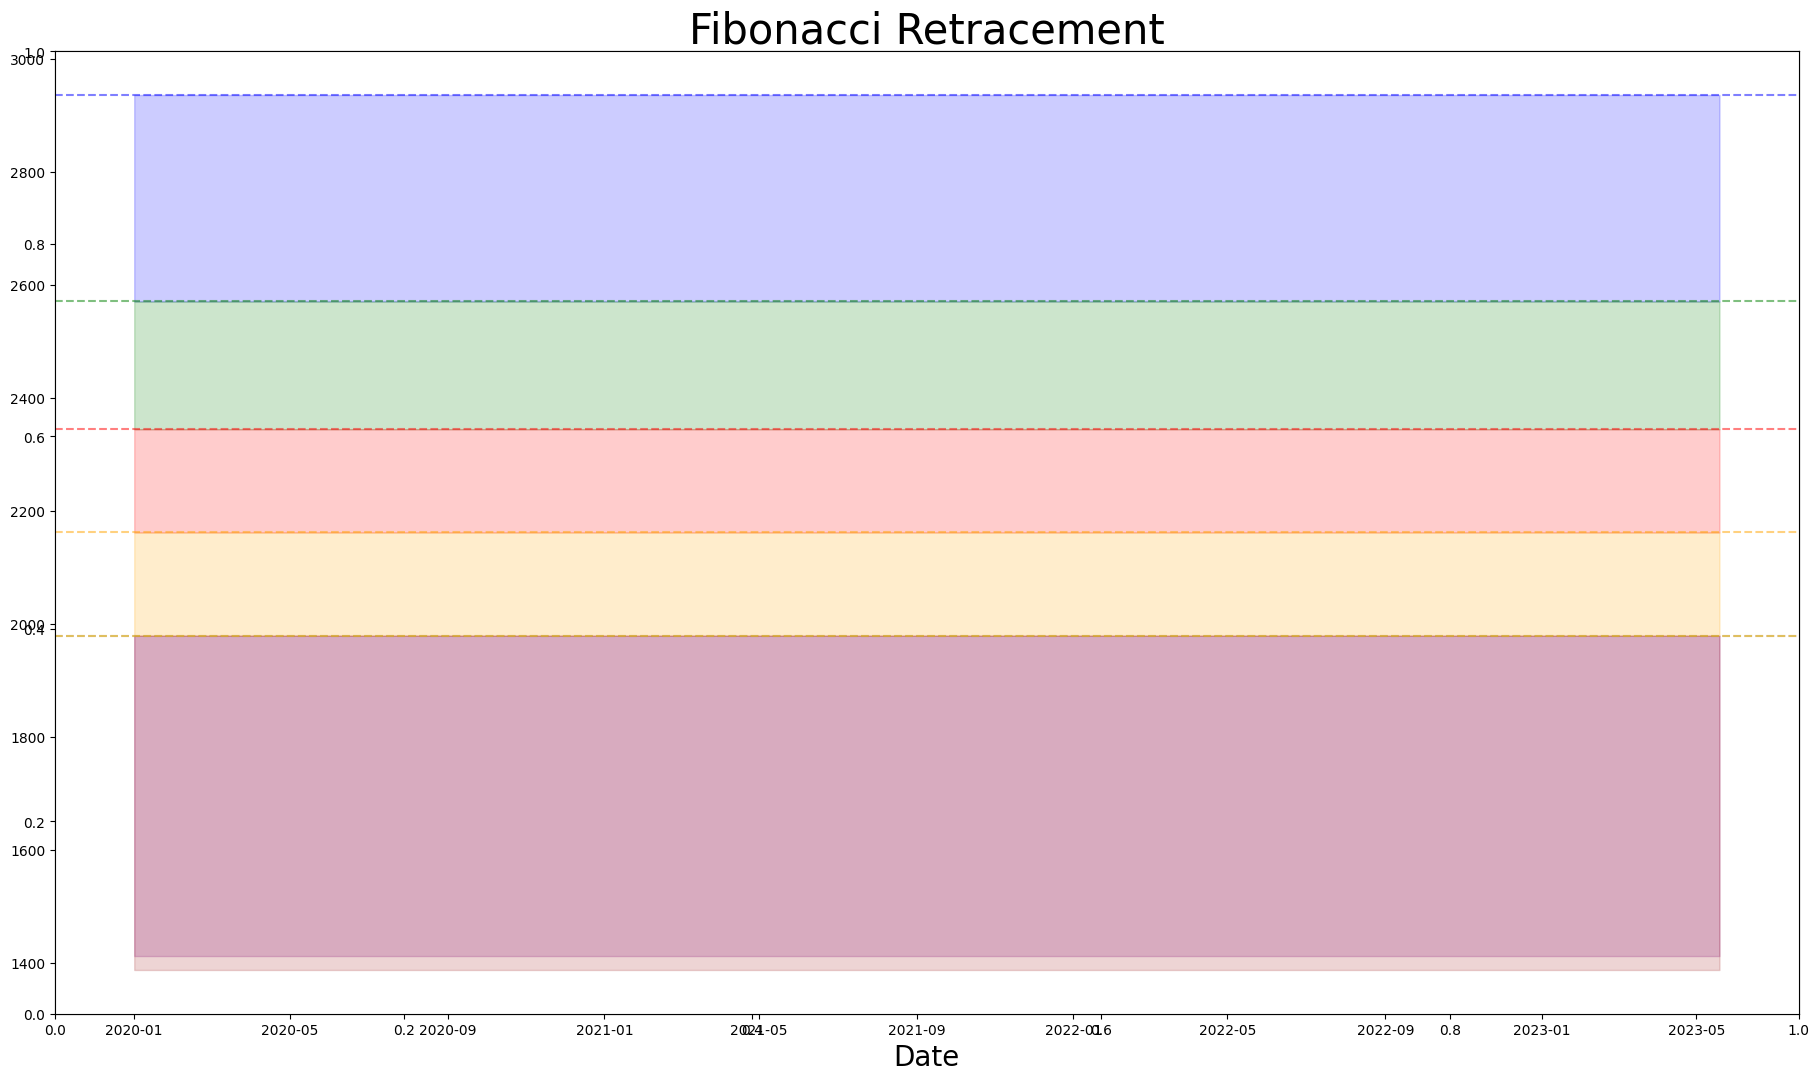

In [4]:

def plot_fibonacci_levels(fibonacci_level):
    # Plot Fibonacci graph
    plot_title = 'Fibonacci Retracement'
    fig = plt.figure(figsize=(22.5, 12.5))
    plt.title(plot_title, fontsize=30)
    ax = fig.add_subplot(111)
    plt.axhline(fibonacci_level['Fibonacci_61.8'], linestyle='--', alpha=0.5, color='purple')
    ax.fill_between(df.index, fibonacci_level['Fibonacci_61.8'], df['Close'].min(), color='purple', alpha=0.2)

    # Fill sections
    plt.axhline(fibonacci_level['Fibonacci_0'], linestyle='--', alpha=0.5, color='blue')
    ax.fill_between(df.index, fibonacci_level['Fibonacci_0'], fibonacci_level['Fibonacci_23.6'], color='blue', alpha=0.2)

    plt.axhline(fibonacci_level['Fibonacci_23.6'], linestyle='--', alpha=0.5, color='green')
    ax.fill_between(df.index, fibonacci_level['Fibonacci_23.6'], fibonacci_level['Fibonacci_38.2'], color='green', alpha=0.2)

    plt.axhline(fibonacci_level['Fibonacci_38.2'], linestyle='--', alpha=0.5, color='red')
    ax.fill_between(df.index, fibonacci_level['Fibonacci_38.2'], fibonacci_level['Fibonacci_50'], color='red', alpha=0.2)

    plt.axhline(fibonacci_level['Fibonacci_50'], linestyle='--', alpha=0.5, color='orange')
    ax.fill_between(df.index, fibonacci_level['Fibonacci_50'], fibonacci_level['Fibonacci_61.8'], color='orange', alpha=0.2)

    plt.axhline(fibonacci_level['Fibonacci_61.8'], linestyle='--', alpha=0.5, color='yellow')
    ax.fill_between(df.index, fibonacci_level['Fibonacci_61.8'], fibonacci_level['Fibonacci_100'], color='brown', alpha=0.2)

    plt.xlabel('Date', fontsize=20)
    plt.show()

# Assuming you have a DataFrame named 'df' with a 'Close' column and the Fibonacci retracement levels dictionary named 'fibonacci_level'
plot_fibonacci_levels(fibonacci_level)


In [5]:
print(df.head(5))

               Open     High      Low    Close   Volume
Date                                                   
2020-01-01  2277.54  2296.85  2269.06  2292.56   945874
2020-01-02  2288.84  2329.11  2281.31  2323.13  1701396
2020-01-03  2312.39  2323.13  2299.96  2311.87  1963923
2020-01-06  2286.96  2302.97  2233.65  2245.61  2656731
2020-01-07  2261.76  2287.71  2241.94  2274.76  3771992


In [6]:
'''
df1 = df.copy()
df1 = df1.resample('W-FRI').agg({
    'High' : 'max',
    'Low' : 'min',
    'Open' : 'first',
    'Close' : 'last'
})
print(df1.head(40))
'''

"\ndf1 = df.copy()\ndf1 = df1.resample('W-FRI').agg({\n    'High' : 'max',\n    'Low' : 'min',\n    'Open' : 'first',\n    'Close' : 'last'\n})\nprint(df1.head(40))\n"

In [7]:
def find_swing_high_low(df):
    swing_highs = []
    swing_lows = []

    for i in range(1, len(df) - 1):
        if (
            df['High'][i] > df['High'][i-1]
            and df['High'][i] > df['High'][i+1]
        ):
            swing_highs.append(df['High'][i])
        else:
            swing_highs.append(None)  # Add None if not a swing high

        if (
            df['Low'][i] < df['Low'][i-1]
            and df['Low'][i] < df['Low'][i+1]
        ):
            swing_lows.append(df['Low'][i])
        else:
            swing_lows.append(None)  # Add None if not a swing low

    swing_highs = [None] + swing_highs + [None]  # Add None for the first and last rows
    swing_lows = [None] + swing_lows + [None]  # Add None for the first and last rows

    for i in range(len(swing_highs)):
        if swing_highs[i] is None:
            swing_highs[i] = swing_highs[i-1]

    for i in range(len(swing_lows)):
        if swing_lows[i] is None:
            swing_lows[i] = swing_lows[i-1]

    df['swing_highs'] = swing_highs
    df['swing_lows'] = swing_lows
    df= df.dropna()
    return df

df1 = find_swing_high_low(df)
print(df1)

               Open     High      Low    Close   Volume  swing_highs  \
Date                                                                   
2020-01-06  2286.96  2302.97  2233.65  2245.61  2656731      2329.11   
2020-01-07  2261.76  2287.71  2241.94  2274.76  3771992      2329.11   
2020-01-08  2248.34  2272.83  2246.93  2266.38  2147334      2329.11   
2020-01-09  2288.84  2319.64  2280.51  2314.65  3247323      2329.11   
2020-01-10  2321.81  2333.73  2298.55  2314.79  2082060      2333.73   
...             ...      ...      ...      ...      ...          ...   
2023-05-15  2735.08  2751.82  2727.36  2740.35  3373596      2723.27   
2023-05-16  2759.00  2764.85  2715.00  2722.65  4677862      2764.85   
2023-05-17  2727.00  2727.00  2688.20  2706.15  2622477      2764.85   
2023-05-18  2715.40  2732.35  2707.10  2716.00  2144878      2732.35   
2023-05-19  2731.70  2731.70  2693.60  2710.95  2303627      2732.35   

            swing_lows  
Date                    
2020-01-06   

In [8]:
def find_confluence(df):
    # Calculate Fibonacci retracement levels
    price_high = df['High'].max()
    price_low = df['Low'].min()
    price_range = price_high - price_low

    fibonacci_levels = [0.236, 0.382, 0.5, 0.618, 0.786]
    fib_levels = []
    for level in fibonacci_levels:
        fib_levels.append(price_high - level * price_range)

    # Look for confluence between Fibonacci levels and other levels
    confluence_levels = []
    for level in fib_levels:

        # Previous price high/low confluence
        if df['swing_highs'].max() >= level >= df['swing_lows'].min():
            confluence_levels.append(level)

    return np.unique(confluence_levels)

confluence_levels = find_confluence(df1)
print(confluence_levels)

[1719.09348 1979.12724 2161.77    2344.41276 2570.39448]


In [9]:
def identify_entry_exit_points(df):
    # Calculate Fibonacci levels
    high = df['High'].max()
    low = df['Low'].min()
    diff = high - low

    fib_levels = [0.0, 0.236, 0.382, 0.5, 0.618, 0.786, 1.0]
    fib_values = [low + level * diff for level in fib_levels]

    # Identify swing highs and swing lows
    df.loc[:, 'IsSwingHigh'] = df['High'] > df['High'].shift(1)
    df.loc[:, 'IsSwingLow'] = df['Low'] < df['Low'].shift(1)

    # Filter swing highs and swing lows
    swing_highs = df.loc[df['IsSwingHigh'], 'High']
    swing_lows = df.loc[df['IsSwingLow'], 'Low']

    # Identify potential entry and exit points
    df['entry_points'] = swing_highs[swing_highs <= fib_values[3]]
    df['exit_points'] = swing_lows[swing_lows >= fib_values[3]]
    df.fillna(method='ffill', inplace=True)
    df = df.fillna(0)
    return df

df2 = identify_entry_exit_points(df1)
df2

C:\Users\Harsh\AppData\Local\Temp\ipykernel_16712\3375240653.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'IsSwingHigh'] = df['High'] > df['High'].shift(1)
C:\Users\Harsh\AppData\Local\Temp\ipykernel_16712\3375240653.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'IsSwingLow'] = df['Low'] < df['Low'].shift(1)
C:\Users\Harsh\AppData\Local\Temp\ipykernel_16712\3375240653.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

,Open,High,Low,Close,Volume,swing_highs,swing_lows,IsSwingHigh,IsSwingLow,entry_points,exit_points
Date,,,,,,,,,,,
2020-01-06,2286.96,2302.97,2233.65,2245.61,2656731,2329.11,2233.65,False,False,0.00,0.00
2020-01-07,2261.76,2287.71,2241.94,2274.76,3771992,2329.11,2233.65,False,False,0.00,0.00
2020-01-08,2248.34,2272.83,2246.93,2266.38,2147334,2329.11,2233.65,False,False,0.00,0.00
2020-01-09,2288.84,2319.64,2280.51,2314.65,3247323,2329.11,2233.65,True,False,0.00,0.00
2020-01-10,2321.81,2333.73,2298.55,2314.79,2082060,2333.73,2233.65,True,False,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...
2023-05-15,2735.08,2751.82,2727.36,2740.35,3373596,2723.27,2706.54,True,False,2159.33,2706.54
2023-05-16,2759.00,2764.85,2715.00,2722.65,4677862,2764.85,2706.54,True,True,2159.33,2715.00
2023-05-17,2727.00,2727.00,2688.20,2706.15,2622477,2764.85,2688.20,False,True,2159.33,2688.20
